# WINE  QUALITY PREDICTION MACHINE LEARNING MODEL:-

In [2]:
#importing the all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
#DATA COLLECTION
#loading the dataset to the pandas DataFrame
wine_dataset=pd.read_csv("wine.csv")

In [6]:
#number of rows and columns in the dataframe:-
wine_dataset.shape

(1599, 12)

In [7]:
#first 5 rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#checking the missing values:-
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#statistical measures of the dataset:-
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


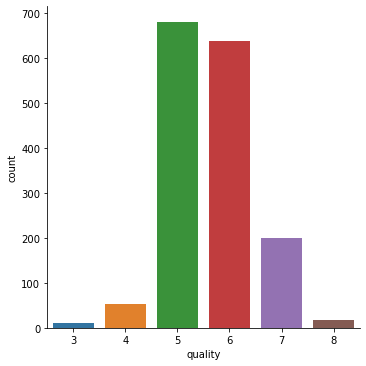

In [12]:
#number of values of each quality:-
sns.catplot(x="quality",data=wine_dataset,kind="count")

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

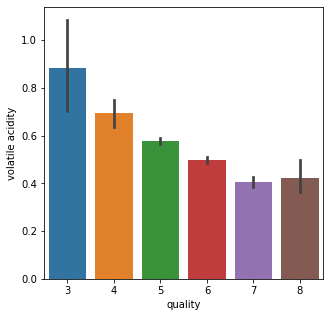

In [15]:
#volatile acidity vs Quality:-
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

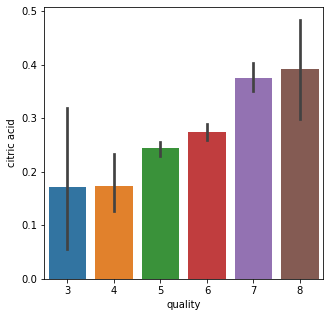

In [16]:
#citric acid vs quality:-
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="citric acid",data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

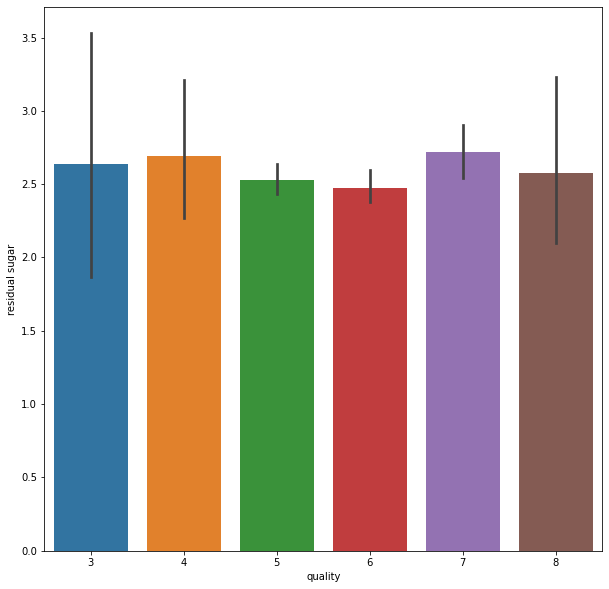

In [17]:
#residue sugar vs quality:-
plot=plt.figure(figsize=(10,10))
sns.barplot(x="quality",y="residual sugar",data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

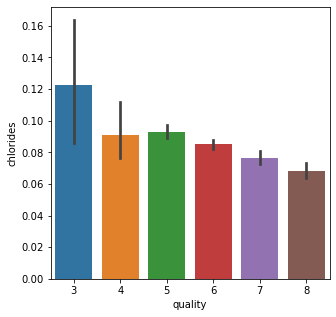

In [18]:
#chlorides vs quality:-
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="chlorides",data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

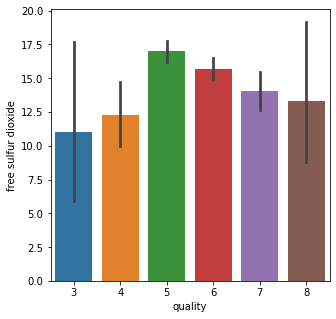

In [21]:
#free suplhur di oxide vs quality:-
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="free sulfur dioxide",data=wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

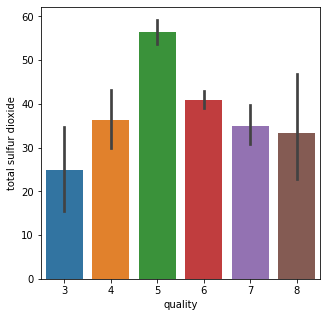

In [23]:
#total sulphur di oxide vs quality:-
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="total sulfur dioxide",data=wine_dataset)

In [24]:
#correlation:-
correlation=wine_dataset.corr()

<AxesSubplot:>

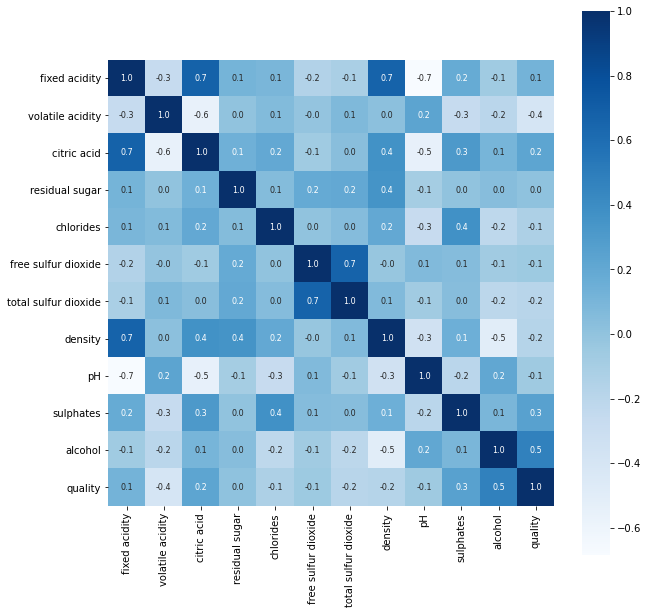

In [28]:
#constructing the heatmap to understand the correlation between the columns:-
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap='Blues')

In [29]:
#separate the data and the label:-
X=wine_dataset.drop('quality',axis=1)

In [30]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [33]:
#label_binarisation:-
Y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [34]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [35]:
#train and test split:-
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)

In [37]:
print(Y.shape,Y_train,Y_test.shape)

(1599,) 606     1
362     0
533     0
1397    0
733     0
       ..
789     0
256     0
968     0
952     1
1273    0
Name: quality, Length: 1279, dtype: int64 (320,)


In [38]:
#random forest classifier:-
#model training:-
model=RandomForestClassifier()

In [39]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [41]:
#Model evaluation
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("accuracy :",test_data_accuracy)

accuracy : 0.934375


In [44]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[1]


In [45]:
if(prediction[0]==1):
    print("Quality of wine is good")
else:
    print("Quality of wine is bad")

Quality of wine is good
